In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [12]:
# Load the dataset
# Load the dataset
df = pd.read_csv("dataset/Blood_Pressure_data.csv")

# Drop unwanted columns
df.drop(['id', 'patient_no', 'weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

# Convert target label into binary
df['Risk'] = df['label'].apply(lambda x: 1 if x == '>5' else 0)
df.drop('label', axis=1, inplace=True)

# Replace '?' with NaN and drop rows with NaNs
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)


In [13]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# One-hot encode
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)



In [14]:
# Define features and label
X = df.drop('Risk', axis=1)
y = df['Risk']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=2, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


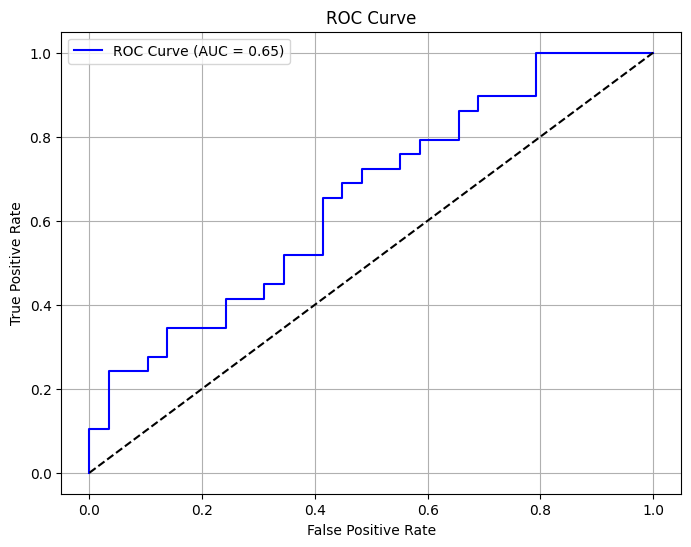

In [17]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})', color='blue')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()